# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). Here are the BASIC requirements of the assignment:

- Load the data.
- Process and normalize the images.
- Build, train and test the two following Deep Neural Networks:
 - First network: must at least consist of three (03) Convolutional layers, two (02) Fully Connected layers, two (02) Pooling layers.
 - Second network: has at most 4M (four millions) parameters (use model.summary() to check). The architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

### Submission {-}
The submission file should be organized as follows:

- ./\<Test-accuracy>-<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code. The file name must include the accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345-assignment5-notebook.ipynb
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. Please follow the submission format to be eligible for this extra credit.

### Deadline {-}
Please visit Canvas for details.

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [3]:
# Import libraries
from keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import LearningRateScheduler


#Load the dataset

In [4]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 [==============================] - 4s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


In [ ]:
# Checking the number of unique classes
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

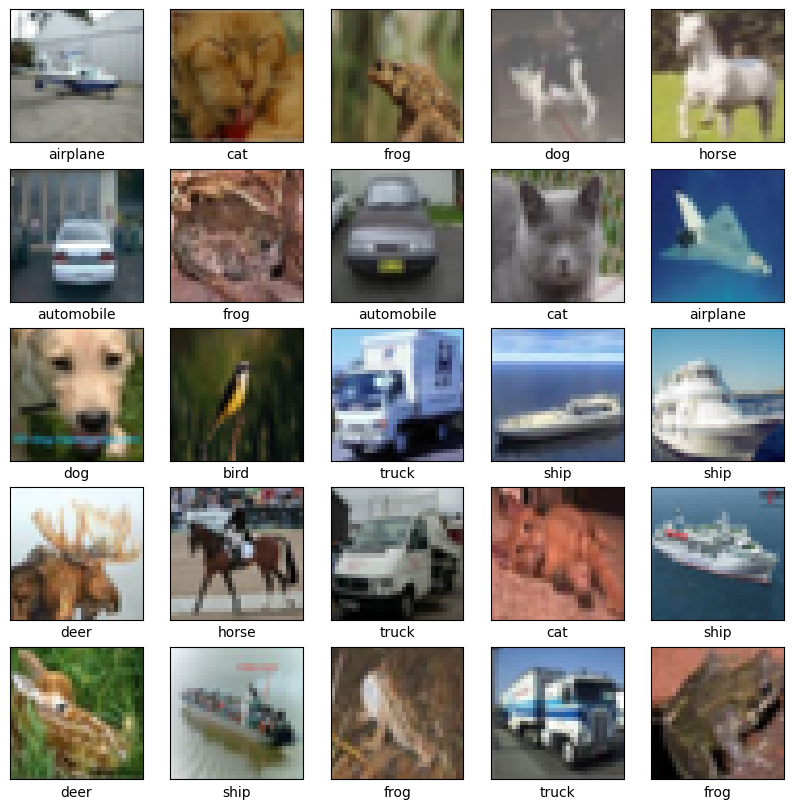

In [ ]:
# Visualizing some of the images from the training dataset
import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

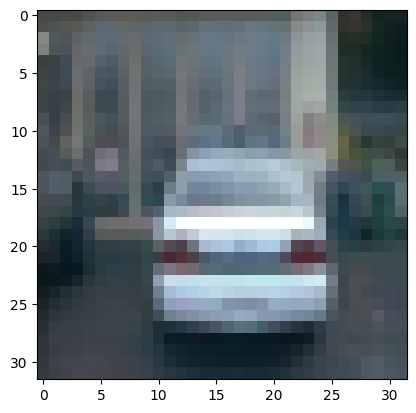

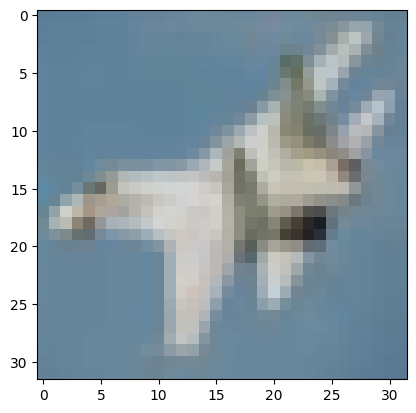

In [4]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

#Process and normalize the images.

In [5]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

from tensorflow.keras.utils import to_categorical

# One-hot-encoding labels
y_train_cat, y_val_cat, y_test_cat = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)

# First Network: model1, history, model1_h, 0.862
(08) Convolutional layers, (03) Fully Connected layers (1024-512-10), (04) Pooling layers, epoch = 200, 2.75M params

Loss and accuracy on the test set: loss = 0.7131471037864685, accuracy = 0.8619999885559082

Previously trained with (08) Convolutional layers, (02) Fully Connected layers (1024-10), (04) Pooling layers, epoch = 100 (but forgot to save the result)

-> **Loss and accuracy on the test set: loss = 0.666954517364502, accuracy = 0.8537999987602234**

In [ ]:
# Define the model using functional API
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x)

model1 = Model(i,x)

model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0   

In [ ]:
# Compile the model
model1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = model1.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=200, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/200
44/44 [==============================] - 23s 365ms/step - loss: 2.3352 - accuracy: 0.2465 - val_loss: 2.4799 - val_accuracy: 0.0960
Epoch 2/200
44/44 [==============================] - 7s 159ms/step - loss: 1.5966 - accuracy: 0.3981 - val_loss: 2.7994 - val_accuracy: 0.1090
Epoch 3/200
44/44 [==============================] - 7s 164ms/step - loss: 1.3915 - accuracy: 0.4856 - val_loss: 2.7504 - val_accuracy: 0.1054
Epoch 4/200
44/44 [==============================] - 7s 160ms/step - loss: 1.2218 - accuracy: 0.5554 - val_loss: 3.3342 - val_accuracy: 0.1020
Epoch 5/200
44/44 [==============================] - 7s 164ms/step - loss: 1.0981 - accuracy: 0.6056 - val_loss: 2.8105 - val_accuracy: 0.1136
Epoch 6/200
44/44 [==============================] - 7s 163ms/step - loss: 0.9873 - accuracy: 0.6443 - val_loss: 3.3169 - val_accuracy: 0.1042
Epoch 7/200
44/44 [==============================] - 7s 162ms/step - loss: 0.8955 - accuracy: 0.6815 - val_loss: 2.9865 - val_accuracy: 0.161

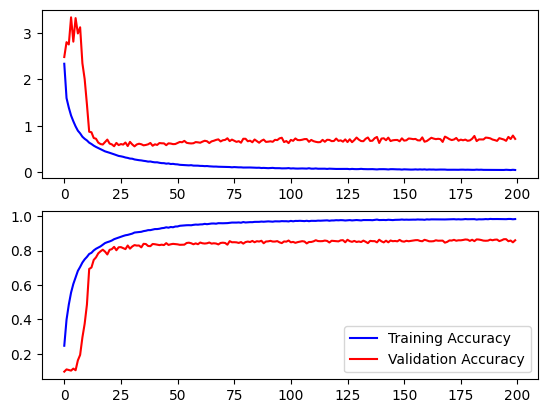

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Show the model performance
result = model1.evaluate(X_test_norm, y_test, verbose=0) # If unspecified, batch_size will default to 32
print(model1.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.7131471037864685, accuracy = 0.8619999885559082


In [ ]:
model1.save('model1_h')

#Second Network: model3, history_3, model3_h3, 0.9034
(08) Convolutional layers, (03) Fully Connected layers (1024-1024-10), (04) Pooling layers, epoch = 200, 3.29M params

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model3 = Model(i, x)

# model description
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

In [ ]:
model3.compile(loss = tf.keras.losses.categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

**Augmenting the data to increase the variability in the training set and help the model generalize better**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)


In [ ]:
# prepare iterator
it_train = datagen.flow(X_train_norm, y_train_cat, batch_size=64)

Train the model

In [ ]:
steps = int(X_train_norm.shape[0] / 64)
history_3 = model3.fit(it_train, steps_per_epoch=steps, epochs=200,validation_data=(X_val_norm, y_val_cat), verbose = 1)

Epoch 1/200
703/703 [==============================] - 45s 45ms/step - loss: 1.6519 - accuracy: 0.4023 - val_loss: 1.5661 - val_accuracy: 0.4556
Epoch 2/200
703/703 [==============================] - 31s 44ms/step - loss: 1.2292 - accuracy: 0.5639 - val_loss: 1.2149 - val_accuracy: 0.5714
Epoch 3/200
703/703 [==============================] - 31s 43ms/step - loss: 1.0393 - accuracy: 0.6372 - val_loss: 0.9819 - val_accuracy: 0.6616
Epoch 4/200
703/703 [==============================] - 33s 47ms/step - loss: 0.9216 - accuracy: 0.6827 - val_loss: 0.9618 - val_accuracy: 0.6854
Epoch 5/200
703/703 [==============================] - 30s 42ms/step - loss: 0.8400 - accuracy: 0.7165 - val_loss: 0.8002 - val_accuracy: 0.7244
Epoch 6/200
703/703 [==============================] - 30s 43ms/step - loss: 0.7918 - accuracy: 0.7305 - val_loss: 0.7988 - val_accuracy: 0.7298
Epoch 7/200
703/703 [==============================] - 29s 41ms/step - loss: 0.7455 - accuracy: 0.7489 - val_loss: 0.8650 - val_ac

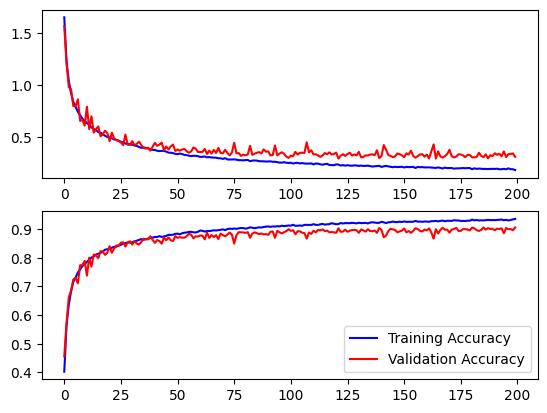

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history_3.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_3.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_3.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_3.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Show the model performance
result2 = model3.evaluate(X_test_norm, y_test_cat)
print('Loss and accuracy on the test set: loss = {}, accuracy = {}'.format(result2[0], result2[1]))

313/313 [==============================] - 2s 8ms/step - loss: 0.3236 - accuracy: 0.9034
Loss and accuracy on the test set: loss = 0.3235502243041992, accuracy = 0.9034000039100647


In [ ]:
# Making the Predictions
pred3 = model3.predict(X_test_norm)
print(pred3)

# Converting the predictions into label index
pred_classes_3 = np.argmax(pred3, axis=1)
print(pred_classes_3)

313/313 [==============================] - 1s 4ms/step
[[1.1429074e-06 9.8174880e-08 8.6162734e-05 ... 8.6723030e-06
  1.6157185e-07 4.4323511e-07]
 [1.3720739e-09 3.2568194e-05 1.9869601e-14 ... 1.2958331e-14
  9.9996746e-01 7.9196312e-09]
 [1.6085067e-05 1.7812124e-01 2.6399613e-08 ... 1.7380976e-09
  8.2179064e-01 7.1949326e-05]
 ...
 [3.0361512e-13 1.1216310e-15 1.3029590e-09 ... 4.3219650e-08
  2.0150907e-15 1.6607075e-15]
 [2.2730425e-11 9.9999988e-01 9.5142188e-17 ... 4.3563917e-17
  1.2872327e-11 9.6861612e-08]
 [1.7913275e-11 2.3425075e-18 8.6336011e-10 ... 9.9999666e-01
  2.4822758e-16 2.3783910e-13]]
[3 8 8 ... 5 1 7]


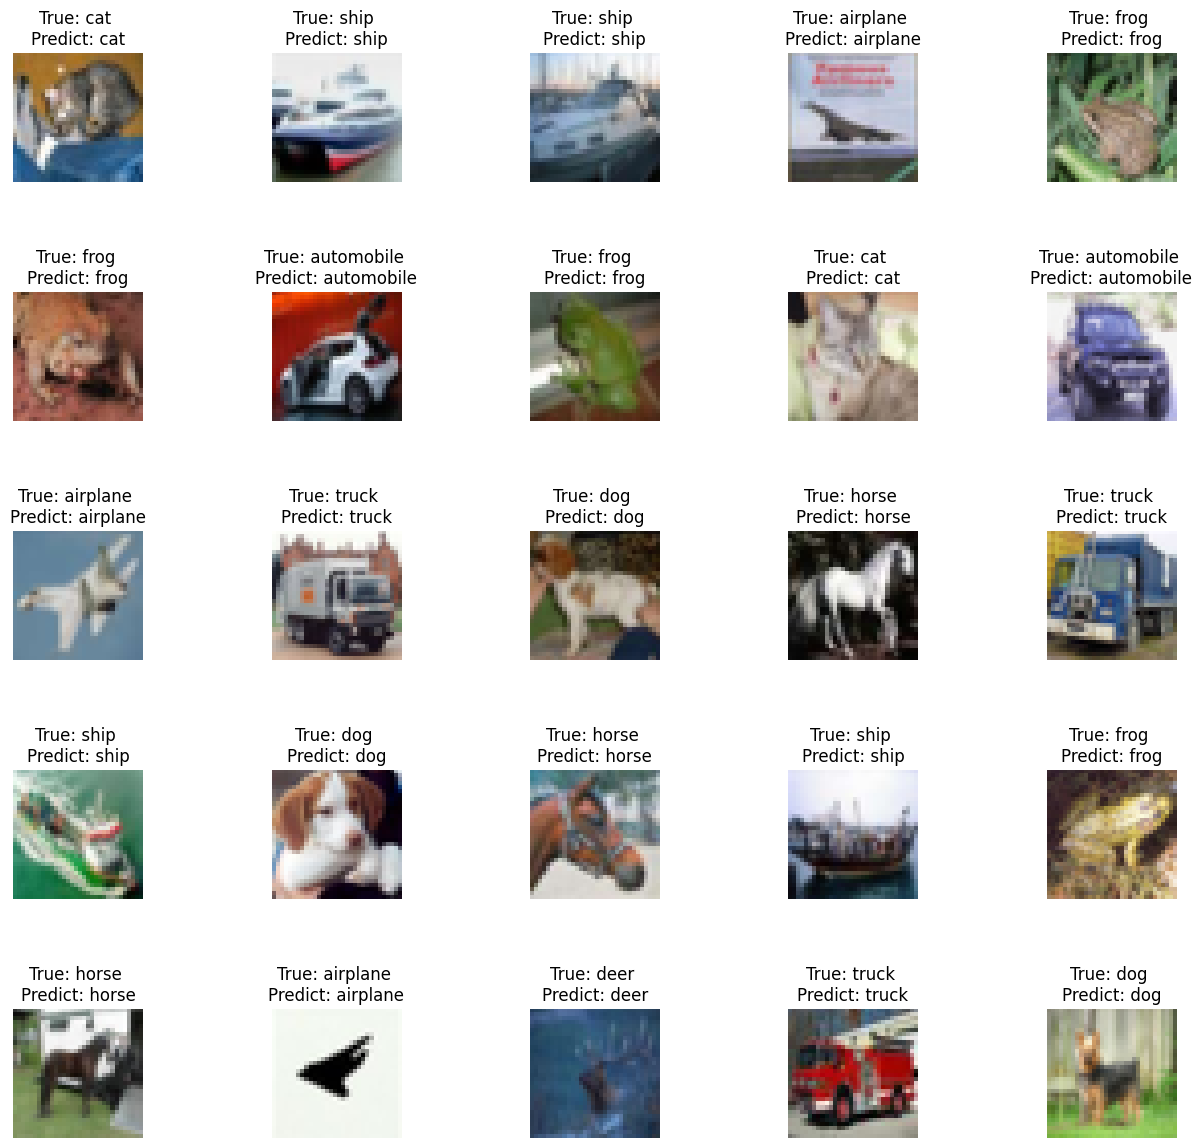

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test_cat[i])], class_names[pred_classes_3[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Other network architectures that I tried

## model2, history_2, 0.875
(08) Convolutional layers, (03) Fully Connected layers (1024-128-10), (04) Pooling layers, epoch = 100, 2.36M params

Loss and accuracy on the test set: loss = 0.4673246443271637, accuracy = 0.8748000264167786

## **Overfitting**

In [ ]:
# Creating a sequential model and adding layers to it
from keras.models import Sequential
from keras import datasets, layers, models

model2 = Sequential()

model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.4))

model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))

model2.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))


model2.add(layers.Flatten())
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1024, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model2 summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_31 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_32 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history_2 = model2.fit(X_train_norm, y_train_cat, batch_size=64, epochs=100,
                    validation_data=(X_test, y_test_cat))

Epoch 1/100
704/704 [==============================] - 17s 16ms/step - loss: 1.6342 - accuracy: 0.4024 - val_loss: 598.9735 - val_accuracy: 0.1646
Epoch 2/100
704/704 [==============================] - 11s 16ms/step - loss: 1.1746 - accuracy: 0.5796 - val_loss: 203.1498 - val_accuracy: 0.2192
Epoch 3/100
704/704 [==============================] - 11s 16ms/step - loss: 0.9707 - accuracy: 0.6589 - val_loss: 118.0905 - val_accuracy: 0.1797
Epoch 4/100
704/704 [==============================] - 11s 16ms/step - loss: 0.8453 - accuracy: 0.7051 - val_loss: 76.2851 - val_accuracy: 0.2167
Epoch 5/100
704/704 [==============================] - 11s 16ms/step - loss: 0.7675 - accuracy: 0.7333 - val_loss: 77.4555 - val_accuracy: 0.1469
Epoch 6/100
704/704 [==============================] - 11s 16ms/step - loss: 0.7080 - accuracy: 0.7572 - val_loss: 60.1412 - val_accuracy: 0.2442
Epoch 7/100
704/704 [==============================] - 11s 16ms/step - loss: 0.6556 - accuracy: 0.7755 - val_loss: 44.324

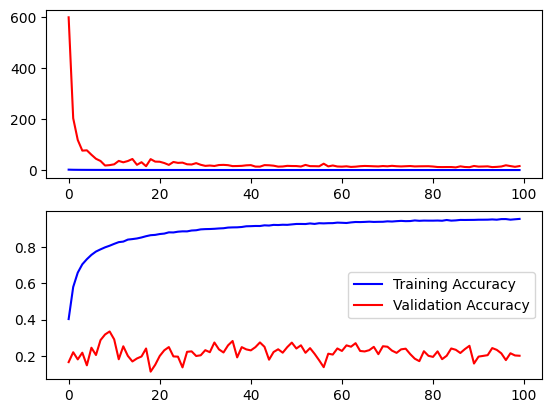

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history_2.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_2.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_2.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_2.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

**-> Overfitting!!**

In [ ]:
# Show the model performance
result2 = model2.evaluate(X_test_norm, y_test_cat, verbose=0) # If unspecified, batch_size will default to 32
print(model2.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result2[0],result2[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.4673246443271637, accuracy = 0.8748000264167786


In [ ]:
# Making the Predictions
pred = model2.predict(X_test)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[1.04436126e-09 9.97725904e-01 2.40724765e-14 ... 1.56373736e-09
  5.61053417e-12 2.27392325e-03]
 [2.52195314e-08 9.98456597e-01 3.23520670e-13 ... 7.56628149e-10
  1.69689920e-05 1.52647472e-03]
 [5.17021654e-05 1.04711376e-01 1.21509828e-07 ... 4.75955994e-06
  2.16142251e-03 8.92590821e-01]
 ...
 [5.12751820e-12 1.42431900e-01 1.02309838e-12 ... 1.96154090e-15
  1.56374635e-10 1.57171002e-13]
 [2.25648364e-07 9.99968529e-01 1.90974725e-09 ... 1.05797608e-05
  5.62398739e-10 1.27714284e-05]
 [1.36016673e-13 9.96333599e-01 5.61389821e-18 ... 4.82006079e-08
  9.53624738e-16 3.66638671e-03]]
[1 1 9 ... 5 1 1]


##model4: model3 but adding learning rate
It ran out of storage of my fourth account during execution but the accuracy did not improve as well so i did not re-execute this model

In [ ]:
# Define a learning rate scheduler
def lr_scheduler(epoch):
    return 1e-3 * (0.9 ** epoch)

# Create a learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model4 = Model(i, x)

# model description
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0   

In [ ]:
# Compile the model
model4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])
# Train the model with data augmentation and learning rate scheduler
history_4 = model4.fit(it_train, steps_per_epoch=steps, epochs=200,
                       validation_data=(X_val_norm, y_val_cat),
                       callbacks=[lr_scheduler_callback], verbose=1)


Epoch 1/200
703/703 [==============================] - 38s 44ms/step - loss: 1.6622 - accuracy: 0.4032 - val_loss: 1.3863 - val_accuracy: 0.5040 - lr: 0.0010
Epoch 2/200
703/703 [==============================] - 31s 45ms/step - loss: 1.2178 - accuracy: 0.5717 - val_loss: 1.2862 - val_accuracy: 0.5698 - lr: 9.0000e-04
Epoch 3/200
703/703 [==============================] - 31s 44ms/step - loss: 1.0184 - accuracy: 0.6435 - val_loss: 0.9573 - val_accuracy: 0.6648 - lr: 8.1000e-04
Epoch 4/200
703/703 [==============================] - 30s 43ms/step - loss: 0.9126 - accuracy: 0.6843 - val_loss: 0.9115 - val_accuracy: 0.6804 - lr: 7.2900e-04
Epoch 5/200
703/703 [==============================] - 31s 44ms/step - loss: 0.8230 - accuracy: 0.7169 - val_loss: 0.8739 - val_accuracy: 0.6984 - lr: 6.5610e-04
Epoch 6/200
703/703 [==============================] - 30s 43ms/step - loss: 0.7657 - accuracy: 0.7371 - val_loss: 0.7125 - val_accuracy: 0.7494 - lr: 5.9049e-04
Epoch 7/200
703/703 [===========

In [ ]:
# Evaluate the model
loss, accuracy = model4.evaluate(X_test_norm, y_test_cat)
print(f"Test accuracy: {accuracy * 100:.2f}%")

## model5: model 3 but adding learning rate, moved the Activation layers after the BatchNormalization layers, 0.866

Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)


In [ ]:
# prepare iterator
it_train = datagen.flow(X_train_norm, y_train_cat, batch_size=64)

In [ ]:
# Define the model using the functional API
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)  # Move activation after BatchNormalization
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x)

model5 = Model(i, x)

In [ ]:
model5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                         

In [ ]:
steps = int(X_train_norm.shape[0] / 64)

In [ ]:
# Compile the model
model5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model with data augmentation and learning rate scheduler
history_5 = model5.fit(it_train, steps_per_epoch=steps, epochs=200,
                       validation_data=(X_val_norm, y_val_cat),
                       callbacks=[lr_scheduler_callback], verbose=1)

Epoch 1/200
703/703 [==============================] - 50s 52ms/step - loss: 1.7285 - accuracy: 0.3751 - val_loss: 1.7244 - val_accuracy: 0.4524 - lr: 0.0010
Epoch 2/200
703/703 [==============================] - 33s 47ms/step - loss: 1.2700 - accuracy: 0.5417 - val_loss: 1.4862 - val_accuracy: 0.5202 - lr: 9.0000e-04
Epoch 3/200
703/703 [==============================] - 34s 49ms/step - loss: 1.0607 - accuracy: 0.6240 - val_loss: 1.1432 - val_accuracy: 0.5962 - lr: 8.1000e-04
Epoch 4/200
703/703 [==============================] - 32s 45ms/step - loss: 0.9343 - accuracy: 0.6700 - val_loss: 1.0243 - val_accuracy: 0.6558 - lr: 7.2900e-04
Epoch 5/200
703/703 [==============================] - 33s 47ms/step - loss: 0.8668 - accuracy: 0.6987 - val_loss: 0.9794 - val_accuracy: 0.6782 - lr: 6.5610e-04
Epoch 6/200
703/703 [==============================] - 33s 47ms/step - loss: 0.8036 - accuracy: 0.7233 - val_loss: 0.8722 - val_accuracy: 0.6952 - lr: 5.9049e-04
Epoch 7/200
703/703 [===========

In [ ]:
# Evaluate the model
loss, accuracy = model5.evaluate(X_test_norm, y_test_cat)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.3979 - accuracy: 0.8657
Test accuracy: 86.57%


##model6: try model ensembling, 0.8375

In [ ]:
# Define base model architecture
def base_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Define multiple base models
num_models = 4
models = []
for i in range(num_models):
    model = base_model(input_shape=(32, 32, 3))
    models.append(model)

# Compile each model
for model in models:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train each model
for i, model in enumerate(models):
    print(f"Training Model {i+1}")
    model.fit(X_train_norm, y_train_cat, epochs=20, batch_size=64, validation_data=(X_val_norm, y_val_cat), verbose=1)

# Evaluate each model on the test set
test_accuracies = []
for i, model in enumerate(models):
    loss, accuracy = model.evaluate(X_test_norm, y_test_cat)
    print(f"Model {i+1} Test Accuracy: {accuracy * 100:.2f}%")
    test_accuracies.append(accuracy)

# Ensemble predictions
ensemble_predictions = np.zeros_like(y_test_cat)
for model in models:
    ensemble_predictions += model.predict(X_test_norm)
ensemble_predictions /= num_models
ensemble_accuracy = np.mean(np.argmax(ensemble_predictions, axis=1) == np.argmax(y_test_cat, axis=1))
print(f"Ensemble Test Accuracy: {ensemble_accuracy * 100:.2f}%")

Training Model 1
Epoch 1/20
704/704 [==============================] - 16s 12ms/step - loss: 1.6479 - accuracy: 0.4317 - val_loss: 1.1858 - val_accuracy: 0.5796
Epoch 2/20
704/704 [==============================] - 8s 11ms/step - loss: 1.1615 - accuracy: 0.5914 - val_loss: 1.3938 - val_accuracy: 0.5518
Epoch 3/20
704/704 [==============================] - 8s 11ms/step - loss: 1.0057 - accuracy: 0.6503 - val_loss: 0.9203 - val_accuracy: 0.6792
Epoch 4/20
704/704 [==============================] - 8s 11ms/step - loss: 0.8943 - accuracy: 0.6910 - val_loss: 0.8680 - val_accuracy: 0.7000
Epoch 5/20
704/704 [==============================] - 8s 12ms/step - loss: 0.8161 - accuracy: 0.7149 - val_loss: 0.8702 - val_accuracy: 0.6962
Epoch 6/20
704/704 [==============================] - 8s 12ms/step - loss: 0.7527 - accuracy: 0.7392 - val_loss: 0.7677 - val_accuracy: 0.7340
Epoch 7/20
704/704 [==============================] - 8s 12ms/step - loss: 0.7038 - accuracy: 0.7578 - val_loss: 0.7943 - va

## model 7: another model ensemble with multiple kinds of base models
(too long excecution time, stuck at fitting svm_model, so I interuptted)

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

# Example feature extraction using Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_norm.reshape(-1, 32*32*3), y_train)

nb_features_train = nb_model.predict_proba(X_train_norm.reshape(-1, 32*32*3))
nb_features_val = nb_model.predict_proba(X_val_norm.reshape(-1, 32*32*3))
nb_features_test = nb_model.predict_proba(X_test_norm.reshape(-1, 32*32*3))

# Example feature extraction using KMeans
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(X_train_norm.reshape(-1, 32*32*3))

kmeans_features_train = kmeans_model.predict(X_train_norm.reshape(-1, 32*32*3)).reshape(-1, 1)
kmeans_features_val = kmeans_model.predict(X_val_norm.reshape(-1, 32*32*3)).reshape(-1, 1)
kmeans_features_test = kmeans_model.predict(X_test_norm.reshape(-1, 32*32*3)).reshape(-1, 1)

# Example feature extraction using Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_norm.reshape(-1, 32*32*3), y_train)

dt_features_train = dt_model.predict(X_train_norm.reshape(-1, 32*32*3)).reshape(-1, 1)
dt_features_val = dt_model.predict(X_val_norm.reshape(-1, 32*32*3)).reshape(-1, 1)
dt_features_test = dt_model.predict(X_test_norm.reshape(-1, 32*32*3)).reshape(-1, 1)

# Example feature extraction using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_norm.reshape(-1, 32*32*3), y_train)

rf_features_train = rf_model.predict_proba(X_train_norm.reshape(-1, 32*32*3))
rf_features_val = rf_model.predict_proba(X_val_norm.reshape(-1, 32*32*3))
rf_features_test = rf_model.predict_proba(X_test_norm.reshape(-1, 32*32*3))

# Example feature extraction using SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_norm.reshape(-1, 32*32*3), y_train)

svm_features_train = svm_model.predict_proba(X_train_norm.reshape(-1, 32*32*3))
svm_features_val = svm_model.predict_proba(X_val_norm.reshape(-1, 32*32*3))
svm_features_test = svm_model.predict_proba(X_test_norm.reshape(-1, 32*32*3))


# Repeat the process for other models (KMeans, Decision Tree, Random Forest, SVM)

# Combine features
combined_features_train = np.concatenate((nb_features_train, kmeans_features_train,
                                          dt_features_train, rf_features_train, svm_features_train), axis=1)
combined_features_val = np.concatenate((nb_features_val, kmeans_features_val,
                                        dt_features_val, rf_features_val, svm_features_val), axis=1)
combined_features_test = np.concatenate((nb_features_test, kmeans_features_test,
                                         dt_features_test, rf_features_test, svm_features_test), axis=1)

# Define neural network architecture
model7 = Sequential([
    Dense(256, activation='relu', input_shape=(combined_features_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model7
model7.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model7
history = model7.fit(combined_features_train, y_train_cat, epochs=10, batch_size=32, validation_data=(combined_features_val, y_val_cat))

# Evaluate the model7
loss, accuracy = model7.evaluate(combined_features_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-a57f7e9f3eb6>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_norm.reshape(-1, 32*32*3), y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war